In [88]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')
import joblib

In [50]:
import seaborn as sns
from itertools import cycle
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [38]:
sales = pd.read_csv('sales_train_evaluation.csv')
sales.name = 'sales'
calendar = pd.read_csv('calendar.csv')
calendar.name = 'calendar'
prices = pd.read_csv('sell_prices.csv')
prices.name = 'prices'

In [55]:
d_cols = [c for c in sales.columns if 'd_' in c]
examples = sales.sample(10, random_state=1).set_index('id')[d_cols].T 

In [56]:
examples

id,HOUSEHOLD_2_332_WI_1_evaluation,FOODS_3_183_CA_3_evaluation,FOODS_2_091_TX_2_evaluation,HOBBIES_1_037_CA_2_evaluation,HOUSEHOLD_2_236_CA_3_evaluation,FOODS_1_045_CA_2_evaluation,FOODS_3_698_CA_1_evaluation,FOODS_1_109_TX_1_evaluation,HOUSEHOLD_1_495_WI_3_evaluation,HOBBIES_1_029_CA_2_evaluation
d_1,0,0,0,0,0,1,0,0,0,0
d_2,1,0,0,0,0,1,0,0,0,2
d_3,0,0,0,0,0,0,0,0,0,0
d_4,0,0,0,0,0,0,0,0,0,4
d_5,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,1,0,0,1,0,0,5,0
d_1938,1,3,2,0,0,1,1,0,3,1
d_1939,0,3,0,0,1,6,0,0,0,1
d_1940,0,4,4,5,1,5,0,0,3,0


HOUSEHOLD_2_332_WI_1_evaluation
FOODS_3_183_CA_3_evaluation
FOODS_2_091_TX_2_evaluation
HOBBIES_1_037_CA_2_evaluation
HOUSEHOLD_2_236_CA_3_evaluation
FOODS_1_045_CA_2_evaluation
FOODS_3_698_CA_1_evaluation
FOODS_1_109_TX_1_evaluation
HOUSEHOLD_1_495_WI_3_evaluation
HOBBIES_1_029_CA_2_evaluation


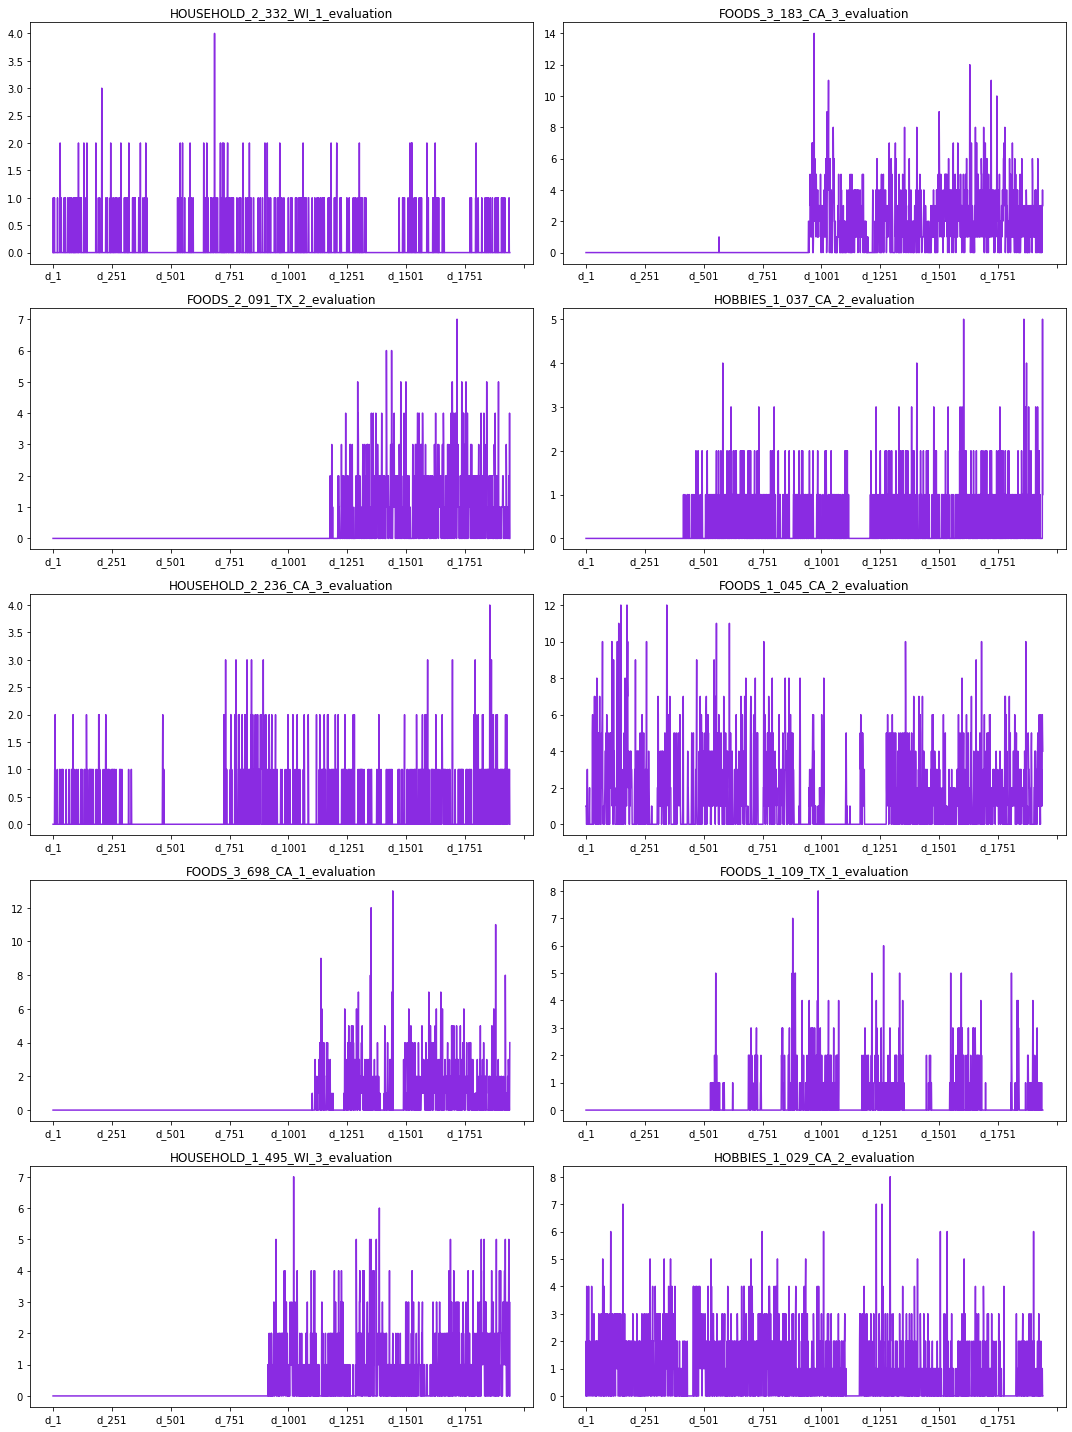

In [62]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in examples.columns:
    print(item)
    examples[item].plot(title=item,
                              color='#8A2BE2',
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [7]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [8]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [14]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [15]:
for d in range(1942,1970): # fill the test day(1942-1969)
    col = 'd_' + str(d)
    sales[col] = 0
    sales[col] = sales[col].astype(np.int16)

In [16]:
def downcast(df): # change the datatype of dataframe to save memory
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

sales = downcast(sales)
prices = downcast(prices)
calendar = downcast(calendar)

In [17]:
# tranform horizontal representation to vertical view
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [19]:
# combine the three tables together
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             object        
 7   sold          int16         
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int8          
 12  month         int8          
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       int8          
 19  snap_TX       int8          
 20  snap_WI       int8          
 21  sell_price    float16       
dtypes: category(11), datetime64[ns](1), float16(1), int16(3), int8(5

In [26]:
# save the memory
df.d = df['d'].apply(lambda x: x.split('_')[1]).astype(np.int16)        
df.drop('date',axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 21 columns):
 #   Column        Dtype   
---  ------        -----   
 0   id            category
 1   item_id       category
 2   dept_id       category
 3   cat_id        category
 4   store_id      category
 5   state_id      category
 6   d             int16   
 7   sold          int16   
 8   wm_yr_wk      int16   
 9   weekday       category
 10  wday          int8    
 11  month         int8    
 12  year          int16   
 13  event_name_1  category
 14  event_type_1  category
 15  event_name_2  category
 16  event_type_2  category
 17  snap_CA       int8    
 18  snap_TX       int8    
 19  snap_WI       int8    
 20  sell_price    float16 
dtypes: category(11), float16(1), int16(4), int8(5)
memory usage: 2.0 GB


In [64]:
ex1=df[df['id']=='HOUSEHOLD_2_332_WI_1_evaluation']
ex2=df[df['id']=='FOODS_3_183_CA_3_evaluation']
ex3=df[df['id']=='HOBBIES_1_037_CA_2_evaluation']

In [66]:
df_ex=[ex1,ex2,ex3]

In [67]:
exp=['HOUSEHOLD_2_332_WI_1_evaluation','FOODS_3_183_CA_3_evaluation','HOBBIES_1_037_CA_2_evaluation']

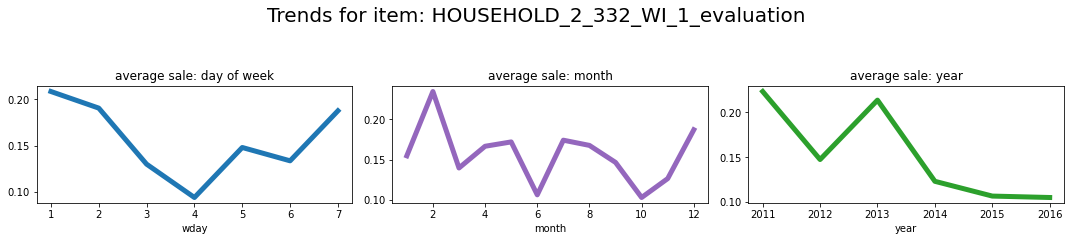

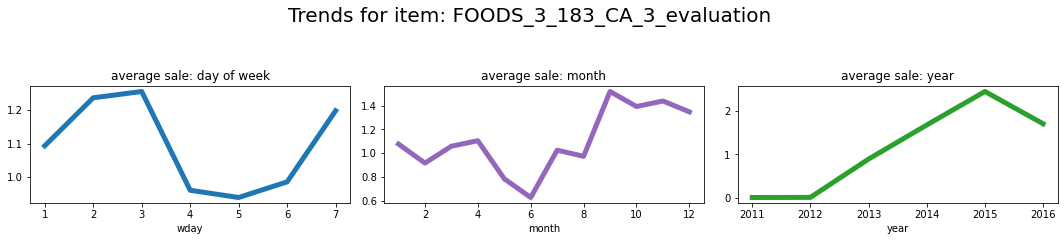

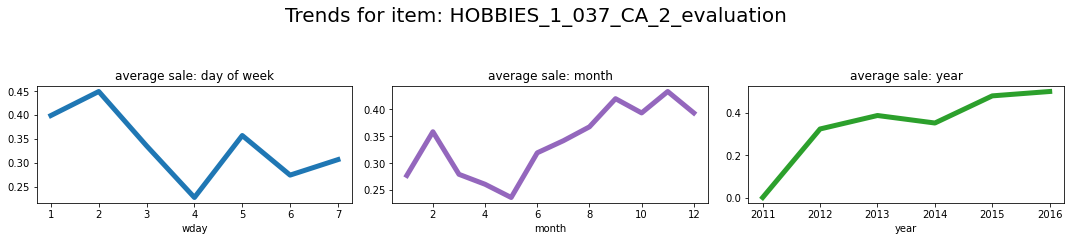

In [77]:
for i in range(3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    df_ex[i].groupby('wday')['sold'].mean()\
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    df_ex[i].groupby('month')['sold'].mean()\
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4], ax=ax2)
    df_ex[i].groupby('year')['sold'].mean()\
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],
                ax=ax3)
    fig.suptitle(f'Trends for item: {exp[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

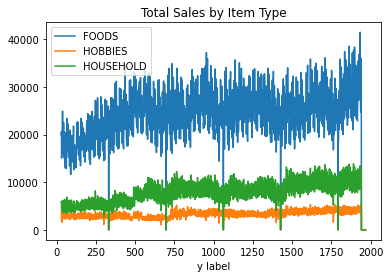

In [91]:
food=df.groupby(['d','cat_id'])['sold'].sum()[:,'FOODS']
hobby=df.groupby(['d','cat_id'])['sold'].sum()[:,'HOBBIES']
house=df.groupby(['d','cat_id'])['sold'].sum()[:,'HOUSEHOLD']
x=range(29,1970)
plt.plot(x,food,label='FOODS')
plt.plot(x,hobby,label='HOBBIES')
plt.plot(x,house,label='HOUSEHOLD')
plt.xlabel('x label')
plt.xlabel('y label')
plt.title('Total Sales by Item Type')
plt.legend()
plt.show()

In [29]:
# add lags of 1 2 3 7 14 28 days
lags = [1,2,3,7,14,28]
for lag in lags:
    df['sold_lag_'+str(lag)] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sold'].shift(lag).astype(np.float16)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 27 columns):
 #   Column        Dtype   
---  ------        -----   
 0   id            category
 1   item_id       category
 2   dept_id       category
 3   cat_id        category
 4   store_id      category
 5   state_id      category
 6   d             int16   
 7   sold          int16   
 8   wm_yr_wk      int16   
 9   weekday       category
 10  wday          int8    
 11  month         int8    
 12  year          int16   
 13  event_name_1  category
 14  event_type_1  category
 15  event_name_2  category
 16  event_type_2  category
 17  snap_CA       int8    
 18  snap_TX       int8    
 19  snap_WI       int8    
 20  sell_price    float16 
 21  sold_lag_1    float16 
 22  sold_lag_2    float16 
 23  sold_lag_3    float16 
 24  sold_lag_7    float16 
 25  sold_lag_14   float16 
 26  sold_lag_28   float16 
dtypes: category(11), float16(7), int16(4), int8(5)
memory usage: 2.7 GB


In [35]:
# add sliding window for 7 30 60 days by mean
for i in [7,30,60]:
    df['rolling_mean_'+str(i)] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(lambda x: x.rolling(window=i).mean()).astype(np.float16)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 30 columns):
 #   Column           Dtype   
---  ------           -----   
 0   id               category
 1   item_id          category
 2   dept_id          category
 3   cat_id           category
 4   store_id         category
 5   state_id         category
 6   d                int16   
 7   sold             int16   
 8   wm_yr_wk         int16   
 9   weekday          category
 10  wday             int8    
 11  month            int8    
 12  year             int16   
 13  event_name_1     category
 14  event_type_1     category
 15  event_name_2     category
 16  event_type_2     category
 17  snap_CA          int8    
 18  snap_TX          int8    
 19  snap_WI          int8    
 20  sell_price       float16 
 21  sold_lag_1       float16 
 22  sold_lag_2       float16 
 23  sold_lag_3       float16 
 24  sold_lag_7       float16 
 25  sold_lag_14      float16 
 26  sold_lag_28 

In [70]:
df[df['id']=='HOBBIES_1_001_CA_1_evaluation'].iloc[1000:1005]

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,...,rolling_mean_30,rolling_mean_60,expanding_mean,item_avg,store_item_avg,cat_item_avg,dept_item_avg,price_momentum,price_momentum_m,price_momentum_y
31343720,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1029,0,11343,Friday,...,0.666504,0.516602,0.055389,0.219604,0.326172,0.219604,0.219604,1.0,1.0,0.986816
31374210,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1030,0,11344,Saturday,...,0.666504,0.516602,0.055328,0.219604,0.326172,0.219604,0.219604,1.0,1.0,0.986816
31404700,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1031,2,11344,Sunday,...,0.666504,0.549805,0.057220,0.219604,0.326172,0.219604,0.219604,1.0,1.0,0.986816
31435190,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1032,1,11344,Monday,...,0.633301,0.566895,0.058136,0.219604,0.326172,0.219604,0.219604,1.0,1.0,0.986816
31465680,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1033,0,11344,Tuesday,...,0.633301,0.549805,0.058075,0.219604,0.326172,0.219604,0.219604,1.0,1.0,0.986816


In [40]:
# add expanding window every 7 days 
df['expanding_mean'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(lambda x: x.expanding(7).mean()).astype(np.float16)

In [42]:
# drop the rows with many NaN
df = df[df['d']>28]

In [49]:
for lag in lags:
    df['sold_lag_'+str(lag)] = df['sold_lag_'+str(lag)].astype(np.int16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 853720 to 60034809
Data columns (total 31 columns):
 #   Column           Dtype   
---  ------           -----   
 0   id               category
 1   item_id          category
 2   dept_id          category
 3   cat_id           category
 4   store_id         category
 5   state_id         category
 6   d                int16   
 7   sold             int16   
 8   wm_yr_wk         int16   
 9   weekday          category
 10  wday             int8    
 11  month            int8    
 12  year             int16   
 13  event_name_1     category
 14  event_type_1     category
 15  event_name_2     category
 16  event_type_2     category
 17  snap_CA          int8    
 18  snap_TX          int8    
 19  snap_WI          int8    
 20  sell_price       float16 
 21  sold_lag_1       int16   
 22  sold_lag_2       int16   
 23  sold_lag_3       int16   
 24  sold_lag_7       int16   
 25  sold_lag_14      int16   
 26  sold_la

In [51]:
import pickle
df.to_pickle('df_1.pkl')

In [52]:
del sales
del calendar
del prices

In [60]:
df['item_id'].nunique()

3049

In [61]:
# add mean encoding for item for it's high categorical
df['item_avg'] = df.groupby('item_id')['sold'].transform('mean').astype(np.float16)
df['store_item_avg'] = df.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['cat_item_avg'] = df.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['dept_item_avg'] = df.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 853720 to 60034809
Data columns (total 35 columns):
 #   Column           Dtype   
---  ------           -----   
 0   id               category
 1   item_id          category
 2   dept_id          category
 3   cat_id           category
 4   store_id         category
 5   state_id         category
 6   d                int16   
 7   sold             int16   
 8   wm_yr_wk         int16   
 9   weekday          category
 10  wday             int8    
 11  month            int8    
 12  year             int16   
 13  event_name_1     category
 14  event_type_1     category
 15  event_name_2     category
 16  event_type_2     category
 17  snap_CA          int8    
 18  snap_TX          int8    
 19  snap_WI          int8    
 20  sell_price       float16 
 21  sold_lag_1       int16   
 22  sold_lag_2       int16   
 23  sold_lag_3       int16   
 24  sold_lag_7       int16   
 25  sold_lag_14      int16   
 26  sold_la

In [65]:
df.to_pickle('df_1.pkl')

In [66]:
# add price momentum by week month year
df['price_momentum'] = df['sell_price']/df.groupby(['store_id','item_id'])['sell_price'].transform(lambda x: x.shift(1))
df['price_momentum_m'] = df['sell_price']/df.groupby(['store_id','item_id','month'])['sell_price'].transform('mean')
df['price_momentum_y'] = df['sell_price']/df.groupby(['store_id','item_id','year'])['sell_price'].transform('mean')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 853720 to 60034809
Data columns (total 38 columns):
 #   Column            Dtype   
---  ------            -----   
 0   id                category
 1   item_id           category
 2   dept_id           category
 3   cat_id            category
 4   store_id          category
 5   state_id          category
 6   d                 int16   
 7   sold              int16   
 8   wm_yr_wk          int16   
 9   weekday           category
 10  wday              int8    
 11  month             int8    
 12  year              int16   
 13  event_name_1      category
 14  event_type_1      category
 15  event_name_2      category
 16  event_type_2      category
 17  snap_CA           int8    
 18  snap_TX           int8    
 19  snap_WI           int8    
 20  sell_price        float16 
 21  sold_lag_1        int16   
 22  sold_lag_2        int16   
 23  sold_lag_3        int16   
 24  sold_lag_7        int16   
 25  sold_lag_14

In [71]:
df.to_pickle('df_1.pkl') # save the data

In [72]:
# a simple test with 1/10 data
df_CA1= df[df['store_id']=='CA_1']

In [73]:
df_CA1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918109 entries, 853720 to 60007368
Data columns (total 38 columns):
 #   Column            Dtype   
---  ------            -----   
 0   id                category
 1   item_id           category
 2   dept_id           category
 3   cat_id            category
 4   store_id          category
 5   state_id          category
 6   d                 int16   
 7   sold              int16   
 8   wm_yr_wk          int16   
 9   weekday           category
 10  wday              int8    
 11  month             int8    
 12  year              int16   
 13  event_name_1      category
 14  event_type_1      category
 15  event_name_2      category
 16  event_type_2      category
 17  snap_CA           int8    
 18  snap_TX           int8    
 19  snap_WI           int8    
 20  sell_price        float16 
 21  sold_lag_1        int16   
 22  sold_lag_2        int16   
 23  sold_lag_3        int16   
 24  sold_lag_7        int16   
 25  sold_lag_14 

In [81]:
valid = df_CA1[(df_CA1['d']>=1914) & (df_CA1['d']<1942)][['id','d','sold']]
test = df_CA1[df_CA1['d']>=1942][['id','d','sold']]
eval_preds = test['sold']
valid_preds = valid['sold']

In [83]:
X_train, y_train = df_CA1[df_CA1['d']<1914].drop('sold',axis=1), df_CA1[df_CA1['d']<1914]['sold']
X_valid, y_valid = df_CA1[(df_CA1['d']>=1914) & (df_CA1['d']<1942)].drop('sold',axis=1), df_CA1[(df_CA1['d']>=1914) & (df_CA1['d']<1942)]['sold']
X_test = df_CA1[df_CA1['d']>=1942].drop('sold',axis=1)

In [93]:
#LGB without tuning

from lightgbm import LGBMRegressor
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=8,
    num_leaves=50,
    min_child_weight=300
)

model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)], eval_metric='rmse', verbose=20, early_stopping_rounds=20)
valid_preds[X_valid.index] = model.predict(X_valid)
eval_preds[X_test.index] = model.predict(X_test)

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 1.86661	training's l2: 3.48424	valid_1's rmse: 1.72176	valid_1's l2: 2.96446
[40]	training's rmse: 1.81402	training's l2: 3.29066	valid_1's rmse: 1.70696	valid_1's l2: 2.91372
[60]	training's rmse: 1.78351	training's l2: 3.18091	valid_1's rmse: 1.69891	valid_1's l2: 2.8863
[80]	training's rmse: 1.76942	training's l2: 3.13085	valid_1's rmse: 1.69851	valid_1's l2: 2.88494
[100]	training's rmse: 1.75378	training's l2: 3.07573	valid_1's rmse: 1.6973	valid_1's l2: 2.88082
Early stopping, best iteration is:
[85]	training's rmse: 1.76552	training's l2: 3.11707	valid_1's rmse: 1.69649	valid_1's l2: 2.87807


In [94]:
features = [f for f in df_CA1.columns if f != 'sold']
important=model.feature_importances_
# get the feature importance
diction=dict(zip(features,important))

In [95]:
print(diction)

{'id': 677, 'item_id': 139, 'dept_id': 6, 'cat_id': 4, 'store_id': 0, 'state_id': 0, 'd': 32, 'wm_yr_wk': 14, 'weekday': 200, 'wday': 94, 'month': 47, 'year': 0, 'event_name_1': 79, 'event_type_1': 1, 'event_name_2': 0, 'event_type_2': 0, 'snap_CA': 24, 'snap_TX': 8, 'snap_WI': 9, 'sell_price': 12, 'sold_lag_1': 288, 'sold_lag_2': 217, 'sold_lag_3': 251, 'sold_lag_7': 135, 'sold_lag_14': 62, 'sold_lag_28': 69, 'rolling_mean_7': 473, 'rolling_mean_30': 122, 'rolling_mean_60': 70, 'expanding_mean': 10, 'item_avg': 7, 'store_item_avg': 14, 'cat_item_avg': 3, 'dept_item_avg': 0, 'price_momentum': 4, 'price_momentum_m': 14, 'price_momentum_y': 25}


In [98]:
diction=sorted(diction.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
diction=dict(diction)
x=list(diction.keys())
y=list(diction.values())

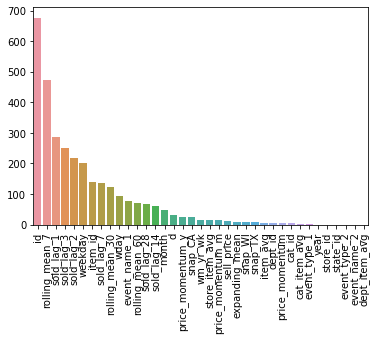

In [127]:
sns.barplot(x,y) # show the importance of feature
plt.xticks(range(37),x, rotation='vertical')
plt.show()